# 10.1. Analyzing the frequency components of a signal with a Fast Fourier Transform

In [1]:
import datetime
import numpy as np
import scipy as sp
import scipy.fftpack
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df0 = pd.read_csv('https://github.com/ipython-books/'
                  'cookbook-2nd-data/blob/master/'
                  'weather.csv?raw=true',
                  na_values=(-9999),
                  parse_dates=['DATE'])

In [3]:
df = df0[df0['DATE'] >= '19940101']

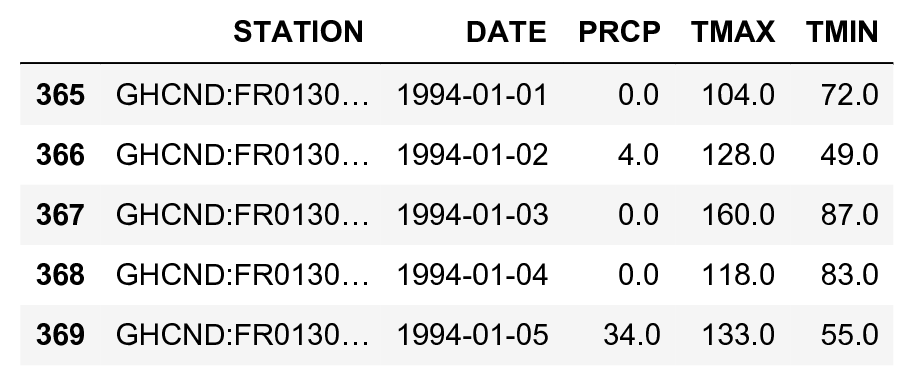

In [4]:
df.head()

In [5]:
df_avg = df.dropna().groupby('DATE').mean()

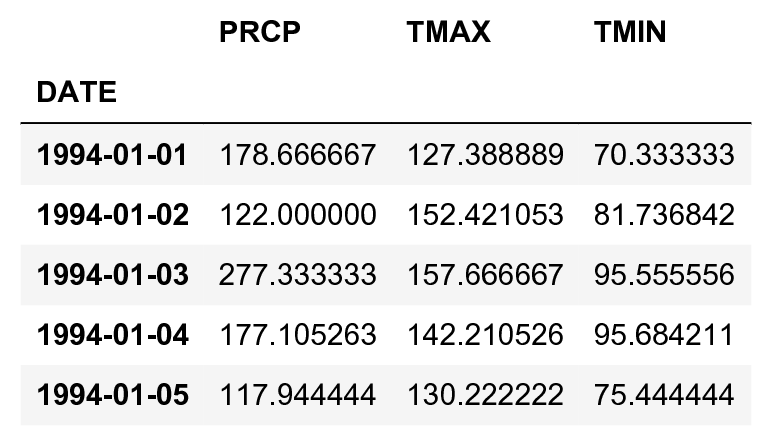

In [6]:
df_avg.head()

In [7]:
date = df_avg.index.to_datetime()
temp = (df_avg['TMAX'] + df_avg['TMIN']) / 20.
N = len(temp)

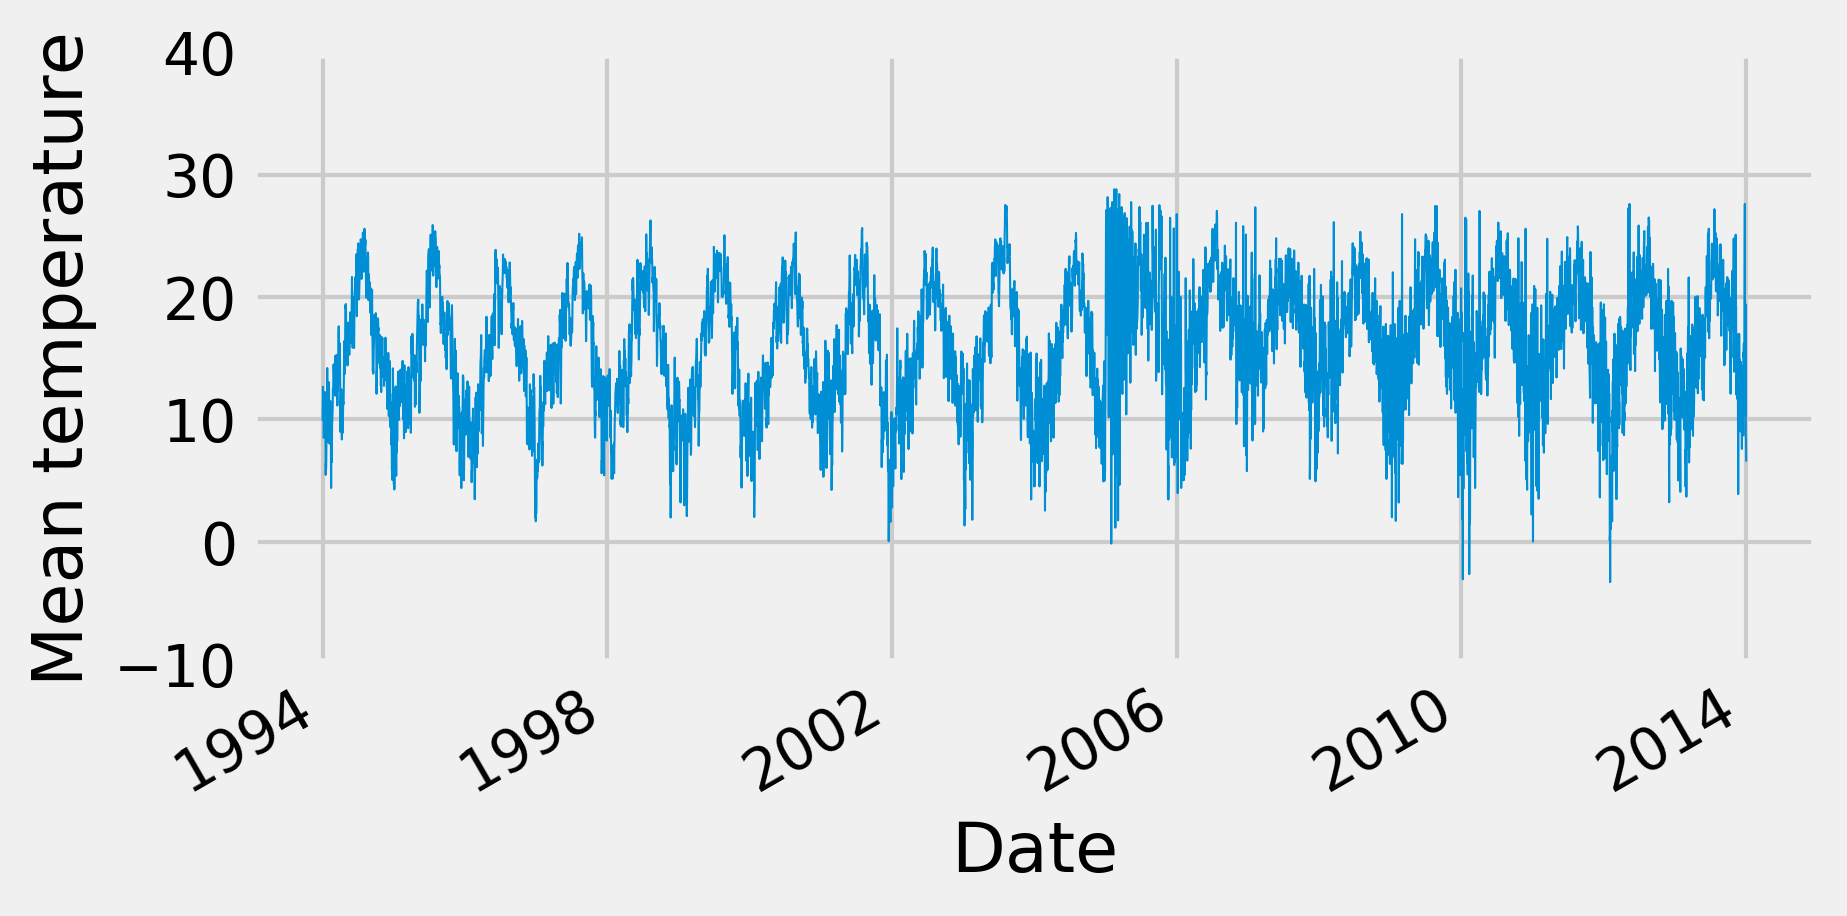

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
temp.plot(ax=ax, lw=.5)
ax.set_ylim(-10, 40)
ax.set_xlabel('Date')
ax.set_ylabel('Mean temperature')

In [9]:
temp_fft = sp.fftpack.fft(temp)

In [10]:
temp_psd = np.abs(temp_fft) ** 2

In [11]:
fftfreq = sp.fftpack.fftfreq(len(temp_psd), 1. / 365)

In [12]:
i = fftfreq > 0

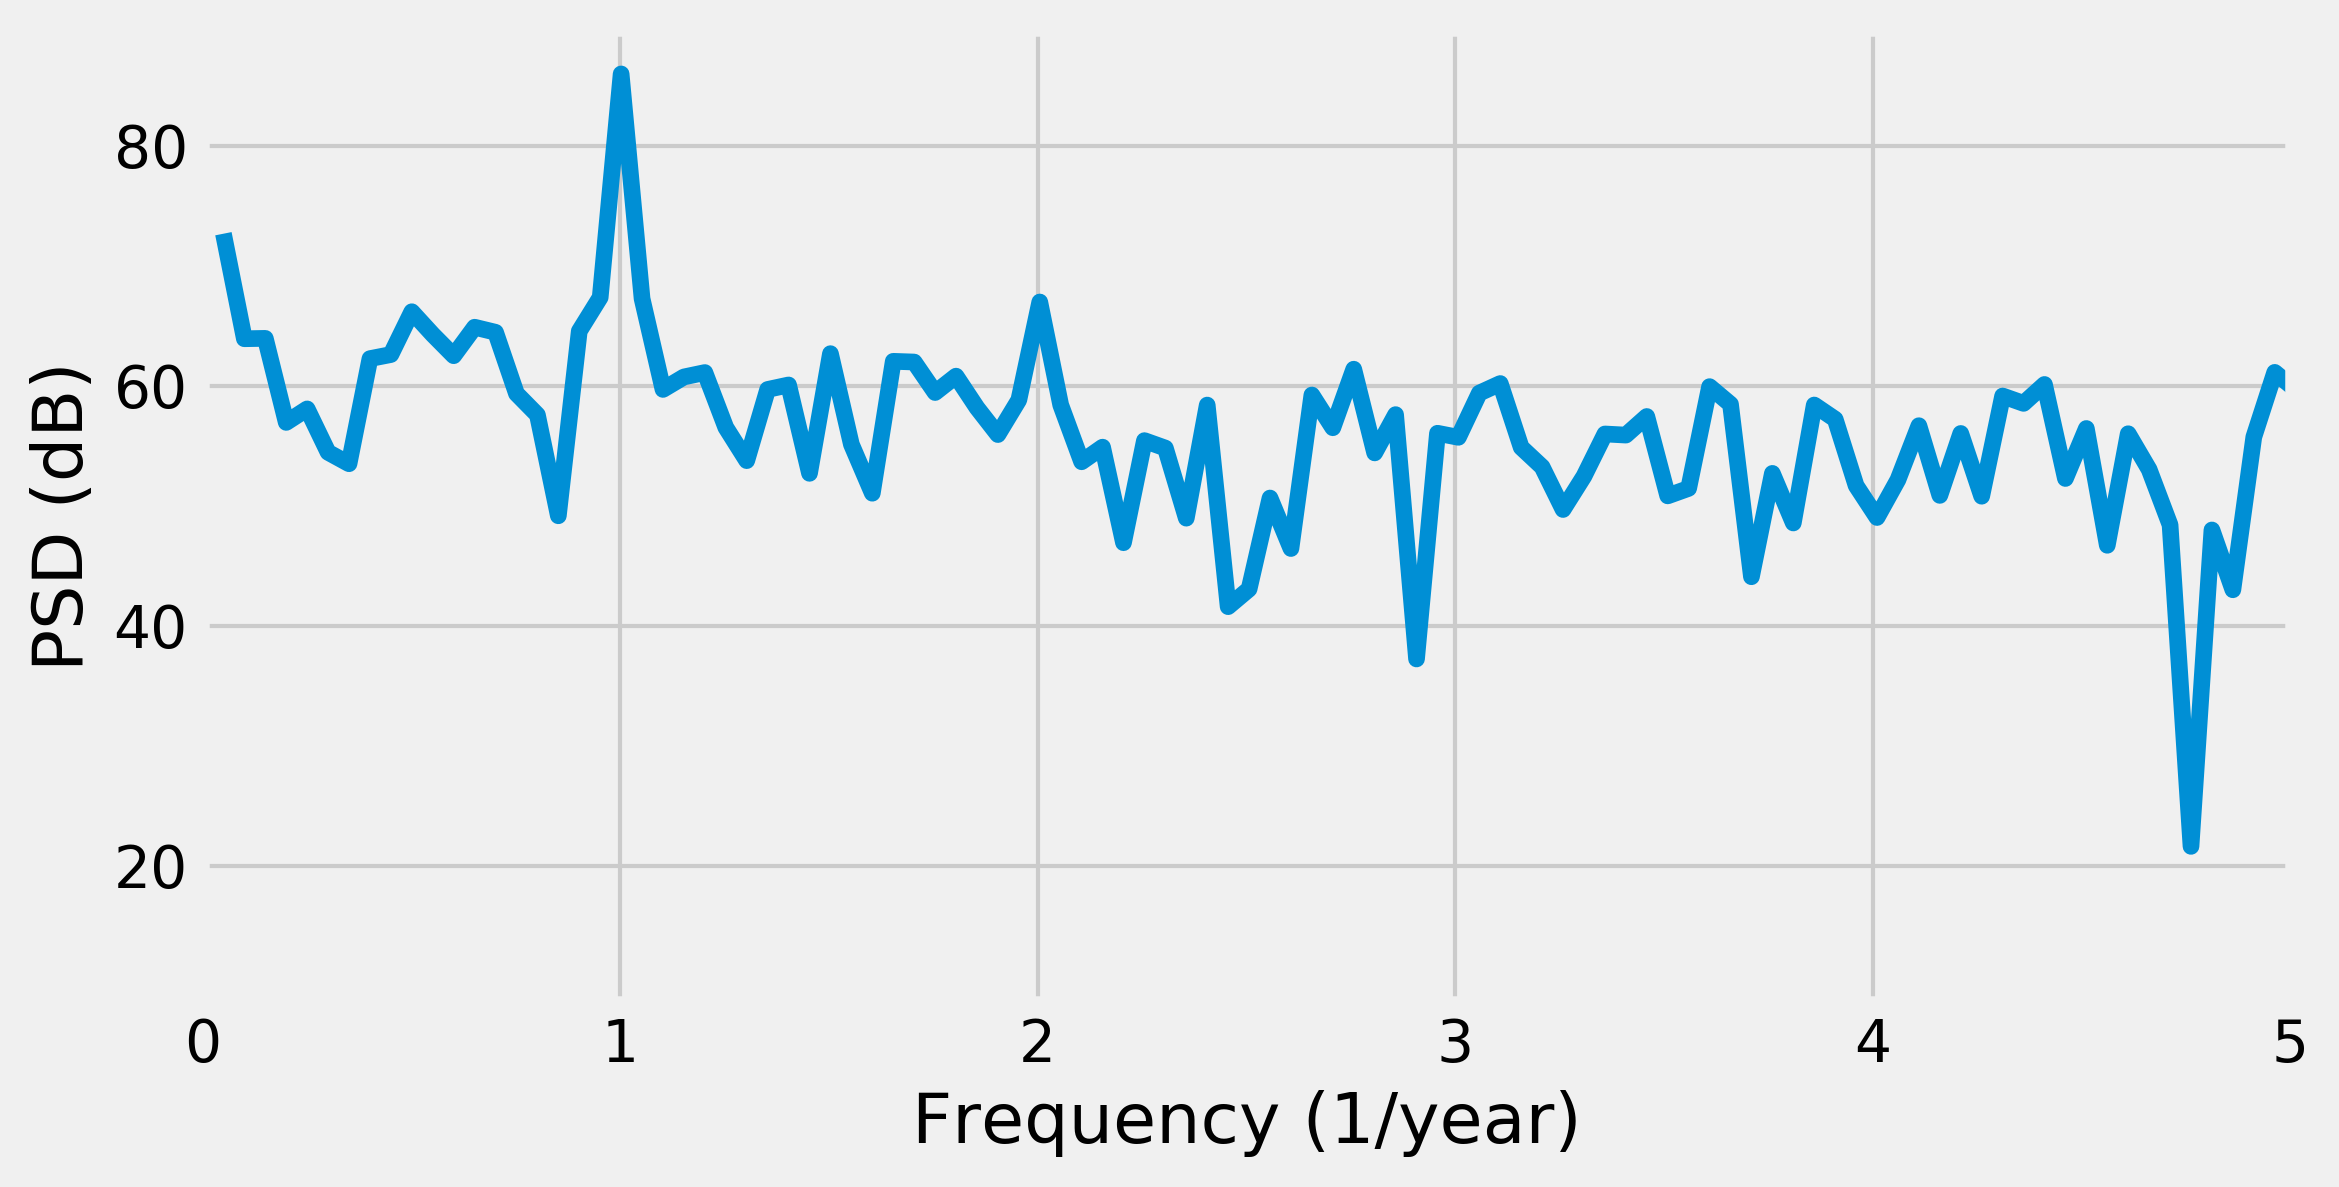

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(fftfreq[i], 10 * np.log10(temp_psd[i]))
ax.set_xlim(0, 5)
ax.set_xlabel('Frequency (1/year)')
ax.set_ylabel('PSD (dB)')

In [14]:
temp_fft_bis = temp_fft.copy()
temp_fft_bis[np.abs(fftfreq) > 1.1] = 0

In [15]:
temp_slow = np.real(sp.fftpack.ifft(temp_fft_bis))

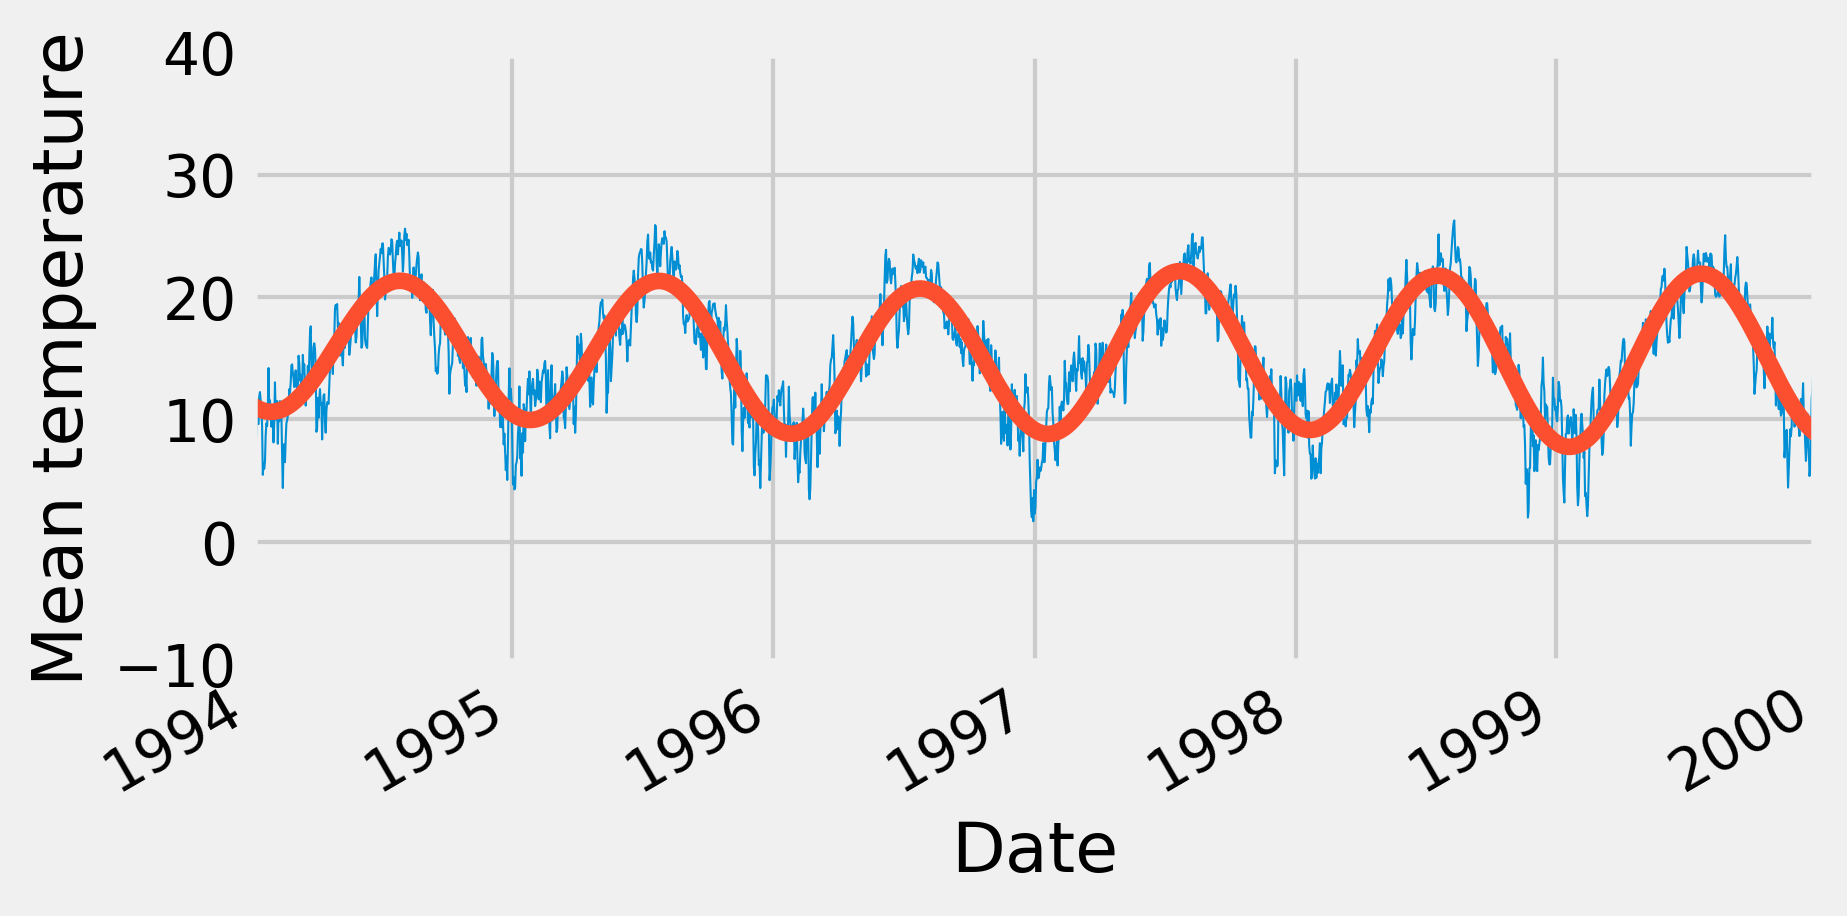

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
temp.plot(ax=ax, lw=.5)
ax.plot_date(date, temp_slow, '-')
ax.set_xlim(datetime.date(1994, 1, 1),
            datetime.date(2000, 1, 1))
ax.set_ylim(-10, 40)
ax.set_xlabel('Date')
ax.set_ylabel('Mean temperature')